# Обзор и первичное исследование данных

## Описание проекта

Аналитический и маркетинговый отделы интернет-магазина подготовили список гипотез для увеличения выручки. 

Нужно проанализировать гипотезы, запустить А/В-тест и проанализировать рузельтаты. 

Цель: определить наиболее приоритетную гипотезу для проверки. На основании анализа А/В-теста определить нужно ли вносить изменения на сайт магазина.   

## Описание данных

**Данные для приоретезации гипотез**

*hypothesis.csv*

Hypothesis — краткое описание гипотезы;

Reach — охват пользователей по 10-балльной шкале;

Impact — влияние на пользователей по 10-балльной шкале;

Confidence — уверенность в гипотезе по 10-балльной шкале;

Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. 

Чем больше значение Efforts, тем дороже проверка гипотезы.


**Данные для А/В-теста**

*orders.csv*

transactionId — идентификатор заказа;

visitorId — идентификатор пользователя, совершившего заказ;

date — дата, когда был совершён заказ;

revenue — выручка заказа;

group — группа A/B-теста, в которую попал заказ.


*visitors.csv* 

date — дата;

group — группа A/B-теста;

visitors — количество пользователей в указанную дату в указанной группе A/B-теста

## Импорт библиотек и данных

In [78]:
import pandas as pd
import numpy as np
import scipy.stats as stats

from IPython.display import display

import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import datetime as dt

#turn off scientific notation 
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
hypothesis = pd.read_csv('https://.../hypothesis.csv')
orders = pd.read_csv('https://.../orders.csv', date_parser='date')
visitors = pd.read_csv('https://.../visitors.csv', date_parser='date')

## Изучение и предобработка данных

In [3]:
#функция для вывода основных характеристик таблицы 

def research(df):
    
# редактирование названий столбцов (строчные буквы, замена пробелов, удаление пробелов в начале и конце строки)
    df.columns = ((df.columns.str.lower()).str.replace(' ', '_')).str.strip()
    
    print('1) Названия столбцов', '\n\n', df.columns)
    print()
      
# вывод части таблицы     
    print('2) Таблица')
    display(df.sample(5, random_state = 42))
    print()
    
#общая инфа по таблице    
    print('3) Общая информация', '\n')
    df.info()
    print()
    
# описательные статистики для object и int, float
    objects = []
    numbers = []
    dates = []
    for i in df:
        if 'datetime' in str(df[i].dtypes):
            dates.append(i)
        if df[i].dtypes == 'object':
            objects.append(i)    
        if df[i].dtypes == bool:
            _
        if 'int' in str(df[i].dtypes) or 'float' in str(df[i].dtypes):
            numbers.append(i)
    
    if not objects:
        print('4) Таблица не содержит качественных переменных')
    else:
        print('4) Описательные статистики качественных переменных', '\n')
        display(df[objects].describe())
    if not numbers:
        print('5) Таблица не содержит количественных переменных')
    else:
        print('5) Описательные статистики количественных переменных', '\n')
        display(df[numbers].describe()) 
    if not dates:
        _
    else:
        display(df[dates].describe())
        
# дубликаты
    if df.duplicated().sum() == 0:
        print('6) Грубых дубликатов не обнаружено')
    else:
        print('6) Количество дубликатов:', df.duplicated().sum())
        print()
        display(df.duplicated())

### hypothesis

In [4]:
research(hypothesis)

1) Названия столбцов 

 Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

2) Таблица


,hypothesis,reach,impact,confidence,efforts
7,Добавить форму подписки на все основные страни...,10,7,8,5
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5



3) Общая информация 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes

4) Описательные статистики качественных переменных 



,hypothesis
count,9
unique,9
top,Добавить форму подписки на все основные страни...
freq,1


5) Описательные статистики количественных переменных 



,reach,impact,confidence,efforts
count,9.00,9.00,9.00,9.00
mean,4.78,4.78,5.56,4.89
std,3.15,3.19,3.05,2.80
min,1.00,1.00,1.00,1.00
25%,3.00,3.00,3.00,3.00
50%,3.00,3.00,7.00,5.00
75%,8.00,7.00,8.00,6.00
max,10.00,10.00,9.00,10.00


6) Грубых дубликатов не обнаружено


В таблице с гипотезами всё ок.

### orders

In [5]:
research(orders)

1) Названия столбцов 

 Index(['transactionid', 'visitorid', 'date', 'revenue', 'group'], dtype='object')

2) Таблица


,transactionid,visitorid,date,revenue,group
921,3102219893,151496413,2019-08-21,350,A
321,1775445570,3118528100,2019-08-19,1090,A
101,3847160695,1830791924,2019-08-01,2350,A
920,3057892078,249864742,2019-08-21,5530,B
58,2145193898,1221478247,2019-08-16,1440,B



3) Общая информация 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionid  1197 non-null   int64 
 1   visitorid      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB

4) Описательные статистики качественных переменных 



,date,group
count,1197,1197
unique,31,2
top,2019-08-05,B
freq,48,640


5) Описательные статистики количественных переменных 



,transactionid,visitorid,revenue
count,1197.00,1197.00,1197.00
mean,2155621385.53,2165960143.10,8348.01
std,1229084904.76,1236014192.15,39191.13
min,1062393.00,5114589.00,50.00
25%,1166775572.00,1111826046.00,1220.00
50%,2145193898.00,2217984702.00,2978.00
75%,3237740112.00,3177606451.00,8290.00
max,4293855558.00,4283872382.00,1294500.00


6) Грубых дубликатов не обнаружено


Еще немного поправим названия столбцов. В остальном всё в порядке (типы данных соответствуют содержащимся данным, пропусков и дубликатов нет). В таблице содержатся данные по заказам за август 2019 г. 

In [6]:
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']

### visitors

In [7]:
research(visitors)

1) Названия столбцов 

 Index(['date', 'group', 'visitors'], dtype='object')

2) Таблица


,date,group,visitors
50,2019-08-20,B,560
56,2019-08-26,B,676
0,2019-08-01,A,719
57,2019-08-27,B,720
5,2019-08-06,A,667



3) Общая информация 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB

4) Описательные статистики качественных переменных 



,date,group
count,62,62
unique,31,2
top,2019-08-26,B
freq,2,31


5) Описательные статистики количественных переменных 



,visitors
count,62.00
mean,607.29
std,114.40
min,361.00
25%,534.00
50%,624.50
75%,710.50
max,770.00


6) Грубых дубликатов не обнаружено


С данными по визитам так же всё в порядке (типы данных соответствуют содержащимся данным, пропусков и дубликатов нет). В таблице содержатся данные за август 2019 г., т.е. периоды по визитам и заказам полностью совпадают.  

### сравнение групп А и В 

In [8]:
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [9]:
group_A = (orders[orders['group'] == 'A'].groupby('visitor_id')
           .agg({'transaction_id': 'count', 'revenue': 'sum'}).reset_index())

group_B = (orders[orders['group'] == 'B'].groupby('visitor_id')
           .agg({'transaction_id': 'count', 'revenue': 'sum'}).reset_index())

In [10]:
len(group_A)

503

In [11]:
len(group_B)

586

In [12]:
len(group_A) + len(group_B)

1089

In [13]:
orders['visitor_id'].nunique()

1031

In [14]:
len(group_B) / orders['visitor_id'].nunique()

0.5683802133850631

In [15]:
len(group_A) / orders['visitor_id'].nunique()

0.48787584869059164

In [16]:
double_users = group_B.query('visitor_id in @group_A.visitor_id')

len(double_users)

58

In [17]:
double_users.head()

,visitor_id,transaction_id,revenue
2,8300375,1,10510
27,199603092,1,3488
33,232979603,1,2640
35,237748145,1,7620
42,276558944,1,12350


In [18]:
orders

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


Найдем долю заказов и сумму заказов по задублированным пользователям

In [19]:
# создадим таблицу с суммой заказов и кол-вом транзакций по задублированным юзерам
double_users_check = (orders
                      .query('visitor_id in @double_users.visitor_id')
                      .agg({'revenue': 'sum', 'transaction_id': 'count'})
                      .to_frame().rename(columns={0:'double_users'})
 
 #добавим данные по сумме заказов и кол-ву транзакций для всех юзеров
                      .join(orders.agg({'revenue': 'sum', 'transaction_id': 'count'})
                            .to_frame().rename(columns={0:'all_users'}))
)

double_users_check['%%_double_users_of_total'] = (
    round(double_users_check['double_users'] / double_users_check['all_users'], 2)
)

double_users_check

,double_users,all_users,%%_double_users_of_total
revenue,1558935,9992563,0.16
transaction_id,181,1197,0.15


Проверим какая доля заказов по задублированным пользователям относится к каждой группе. 

In [20]:
# таблица по сумме заказов и кол-ву транзакций по группам
double_users_check_group = (orders.groupby('group').agg({'revenue': 'sum', 'transaction_id': 'count'}).T
                            .rename(columns={'A':'A_total', 'B':'B_total'})
# добавляем по сумме заказов и кол-ву транзакций данные по задублированным юзерам
                            .join(
                                orders.
                                query('visitor_id in @double_users.visitor_id')
                                .groupby('group').agg({'revenue': 'sum', 'transaction_id': 'count'}).T
                            )
                     )

double_users_check_group['%_double_users_of_total_A'] = (
    round(double_users_check_group['A'] / double_users_check_group['A_total'], 2)
)

double_users_check_group['%_double_users_of_total_B'] = (
    round(double_users_check_group['B'] / double_users_check_group['B_total'], 2)
)

double_users_check_group

group,A_total,B_total,A,B,%_double_users_of_total_A,%_double_users_of_total_B
revenue,4084803,5907760,720147,838788,0.18,0.14
transaction_id,557,640,89,92,0.16,0.14


Разделение на группы для тестирования было проведено не очень качественно. 
- группы получились разного размера, что в принципе компенсируется достаточным размером выборок, но  
- есть пользователи, которые попали в обе группы, что недопустимо при проведении А/В-теста. 

Таких пользователей - 58 человек, при этом сумма их заказов составляет 15 % от общего, количество заказов - 16 % от общего.

Сумма и кол-во заказов задублированных пользователей в группах распределены неодинаково. В группе А сумма заказов - 18 %, в группе В - 14 %. Кол-во заказов в группе А - 16 %, в группе В - 14 %. 
Если бы доли были одинаковыми, то это в некотором образе нивелировало эффект от дублирования, но это не так. 

Стоит отметить, что для дальнейшего проведения анализа невозможно корректно очистить таблицы `visitors` и `orders`, т.к. таблица `visitors` содержит только общее кол-во посетителей по группам в определенную дату и мы не можем знать в какую из групп в какую дату были отнесены наши "дублирующиеся" пользователи. 
Проведем анализ на тех данных, которые имеем. 

# Анализ данных

## Приоритезация гипотез

In [21]:
#отображение колонок с максимальной шириной
pd.set_option("max_colwidth", -1)

### с применением фреймворка ICE

In [22]:
hypothesis['ice'] = ((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']).round(2)

In [23]:
#добавим столбец с "местами" в рейтинге - "ice_rating"
hypothesis_ice = (hypothesis[['hypothesis', 'ice']]
                  .sort_values(by='ice', ignore_index=True)
                  .reset_index())
hypothesis_ice.columns = ['ice_rating', 'hypothesis', 'ice']

In [24]:
hypothesis_ice.sort_values(by='ice', ascending=False)

,ice_rating,hypothesis,ice
8,8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
7,7,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
6,6,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
5,5,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
4,4,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
3,3,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
2,2,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
1,1,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
0,0,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


### с применением фреймворка RICE

In [25]:
hypothesis['rice'] = (((hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) 
                       / hypothesis['efforts']).round(2))

In [26]:
#добавим столбец с "местами" в рейтинге - "rice_rating"
hypothesis_rice = (hypothesis[['hypothesis', 'rice']]
                   .sort_values(by='rice', ignore_index=True)
                   .reset_index())
hypothesis_rice.columns = ['rice_rating','hypothesis', 'rice']

In [27]:
hypothesis_rice.sort_values(by='rice', ascending=False)

,rice_rating,hypothesis,rice
8,8,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.00
7,7,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.00
5,5,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.00
6,6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.00
4,4,"Запустить акцию, дающую скидку на товар в день рождения",16.20
3,3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.00
1,1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.00
2,2,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.00
0,0,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.00


In [28]:
hypothesis = (hypothesis
              .merge(hypothesis_ice, on=['hypothesis', 'ice'])
              .merge(hypothesis_rice, on=['hypothesis', 'rice'])
             )

hypothesis

,hypothesis,reach,impact,confidence,efforts,ice,rice,ice_rating,rice_rating
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.00,7,5
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.00,3,1
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.00,4,7
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.00,1,3
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.00,0,0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.00,2,2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.00,5,6
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.00,6,8
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.20,8,4


In [29]:
print('Рейтинг гипотез по методам ICE и RICE \n(чем выше значение, тем лучше)')

cm = sns.light_palette("green", as_cmap=True)
(hypothesis[['hypothesis', 'reach', 'impact', 'confidence', 'efforts', 'ice_rating', 'rice_rating']]
 .sort_values(by='rice_rating', ascending=False)
 .style.background_gradient(cmap=cm))

Рейтинг гипотез по методам ICE и RICE 
(чем выше значение, тем лучше)


,hypothesis,reach,impact,confidence,efforts,ice_rating,rice_rating
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,6,8
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,4,7
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,5,6
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,7,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,8,4
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1,3
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,2,2
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,3,1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,0,0


**Вывод** 

При применении метода ICE приоритетной для проверки является гипотеза "Запустить акцию, дающую скидку на товар в день рождения". 

При применении метода RICE приоритетной для проверки является гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". 

Приоритизация гипотез с применением метода RICE вместо ICE ожидаемо поменяла рейтинг гипотез, т.к. метод RICE учитывает охват пользователей, что хорошо видно в таблице выше по цветовой градации: гипотезы с высокими показателями `impact`, `confidence` и `reach` занимают более высокие позиции. 

Предполагаю, что с учетом специфики интернет-торговли для приоритезации гипотез более оправдано использование метода RICE. 

In [30]:
#отмена отображения колонок с максимальной шириной
pd.reset_option("max_colwidth")

## Анализ

Мы провели A/B-тест и получили результаты, которые описаны в `orders` и `visitors`

### Кумулятивные метрики

#### график кумулятивной выручки по группам

In [31]:
# создаем массив уникальных пар значений дат и групп теста
dates_groups = orders[['date','group']].drop_duplicates()
dates_groups.head()

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


In [32]:
# получаем агрегированные кумулятивные по дням данные о заказах 
orders_aggregated = (
    dates_groups
    .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
           .agg({
               'date' : 'max', 
               'group' : 'max', 
               'transaction_id' : pd.Series.nunique, 
               'visitor_id' : pd.Series.nunique, 
               'revenue' : 'sum'
           })
           , axis=1)
    .sort_values(by=['date','group'])
)

orders_aggregated.columns = ['date', 'group', 'orders', 'buyers', 'revenue']

orders_aggregated.head()

,date,group,orders,buyers,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


In [33]:
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitors_aggregated = (
    dates_groups
    .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
           .agg({
               'date' : 'max', 
               'group' : 'max', 
               'visitors' : 'sum'
           })
           , axis=1)
    .sort_values(by=['date','group'])
)

visitors_aggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [34]:
# объединяем кумулятивные данные в одной таблице
cumulative_df = orders_aggregated.merge(visitors_aggregated, on=['date', 'group'])
cumulative_df.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


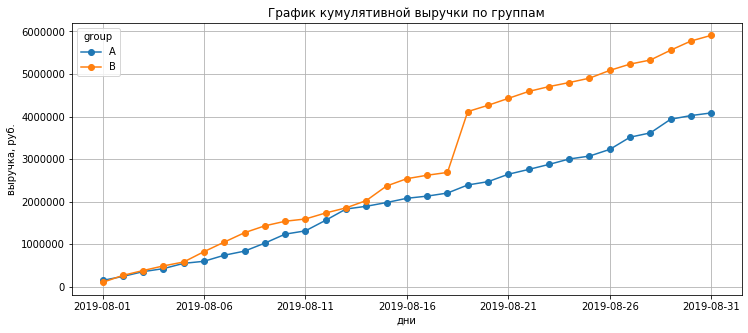

In [35]:
cumulative_df.pivot_table(index='date', columns='group', values='revenue').plot(figsize=(12, 5), grid=True, style='-o')

plt.xlabel('дни')
plt.ylabel('выручка, руб.')
plt.title('График кумулятивной выручки по группам')
plt.show()

На протяжение всего теста, кроме первых 5 дней, выручка в группе В выше, чем в группе А. После 18.08 в группе В наблюдаем всплеск. В группе А выручка растет почти линейно, без резких спадов или всплесков.   

#### график кумулятивной среднего чека по группам

In [36]:
#считаем средний чек
cumulative_df['avg_check'] = (cumulative_df['revenue'] / cumulative_df['orders']).round(2)

In [37]:
#группируем таблицу по среднему чеку по группам
cumulative_avg_check = cumulative_df.pivot_table(index='date', columns='group', values='avg_check').reset_index()
cumulative_avg_check.columns = ['date', 'avg_check_A', 'avg_check_B']

cumulative_avg_check.head()

,date,avg_check_A,avg_check_B
0,2019-08-01,6190.79,4819.86
1,2019-08-02,5509.11,5927.73
2,2019-08-03,5218.74,6245.84
3,2019-08-04,5067.85,6276.50
4,2019-08-05,5045.11,5762.33


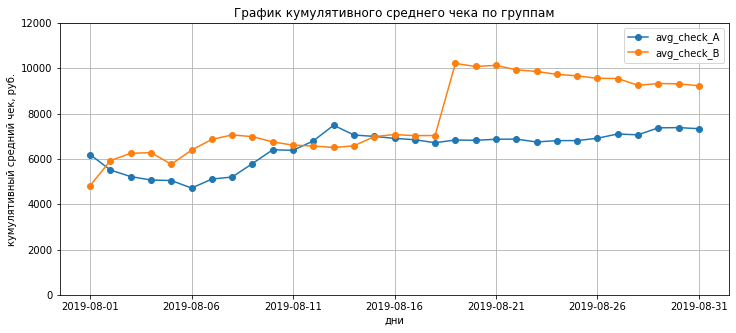

In [38]:
cumulative_avg_check.plot(x='date', y=['avg_check_A', 'avg_check_B'], figsize=(12, 5), grid=True, style='-o', 
                          ylim=(0, 12000))

plt.xlabel('дни')
plt.ylabel('кумулятивный средний чек, руб.')
plt.title('График кумулятивного среднего чека по группам')
plt.show()

После 18.08 можно предположить, что сумма среднего чека начала устанавливаться, сильных колебаний, как в первой половине месяца, почти не наблюдается. Сумма среднего чека для группы А растет, для В - падает. 

#### график относительного изменения кумулятивного среднего чека группы B к группе A

In [39]:
#считаем относительное различие для среднего чека
cumulative_avg_check['relative_dif_avg_check'] = (
    (cumulative_avg_check['avg_check_B'] / cumulative_avg_check['avg_check_A'] - 1 )
    .round(2)
)

cumulative_avg_check.head()

,date,avg_check_A,avg_check_B,relative_dif_avg_check
0,2019-08-01,6190.79,4819.86,-0.22
1,2019-08-02,5509.11,5927.73,0.08
2,2019-08-03,5218.74,6245.84,0.20
3,2019-08-04,5067.85,6276.50,0.24
4,2019-08-05,5045.11,5762.33,0.14


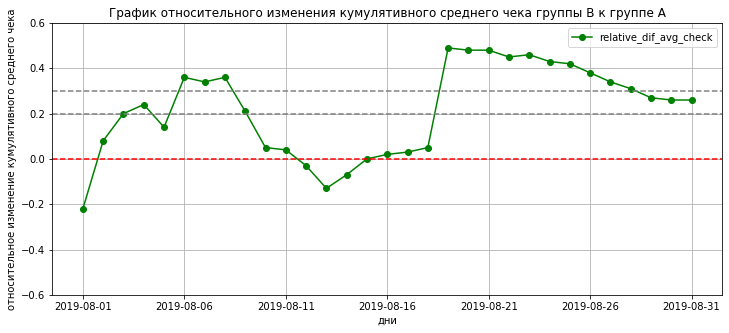

In [40]:
cumulative_avg_check.plot(x='date', y='relative_dif_avg_check', 
                          figsize=(12, 5), grid=True, style='-o', color='green', 
                          ylim=(-0.6, 0.6))

plt.xlabel('дни')
plt.ylabel('относительное изменение кумулятивного среднего чека')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')

plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axhline(y=0.3, color='grey', linestyle='--')
plt.axhline(y=0, color='red', linestyle='--') 

plt.show()

На графике несколько точек "скачков", что говорит о наличии выбросов в данных. 

#### график кумулятивной конверсии по группам

In [41]:
cumulative_df['conversion'] = cumulative_df['orders'] / cumulative_df['visitors']

In [42]:
#группируем таблицу по конверсии по группам
cumulative_conversion = cumulative_df.pivot_table(index='date', columns='group', values='conversion').reset_index()
cumulative_conversion.columns = ['date', 'conversion_A', 'conversion_B']

cumulative_conversion.head()

,date,conversion_A,conversion_B
0,2019-08-01,0.03,0.03
1,2019-08-02,0.03,0.03
2,2019-08-03,0.04,0.03
3,2019-08-04,0.03,0.03
4,2019-08-05,0.03,0.03


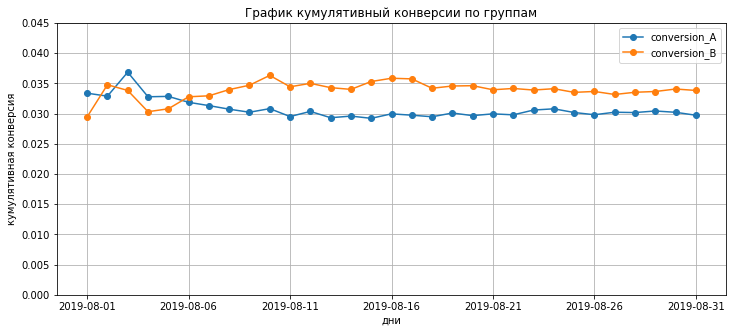

In [43]:
cumulative_conversion.plot(x='date', y=['conversion_A', 'conversion_B'], figsize=(12, 5), grid=True, style='-o', 
                           ylim=(0, 0.045))

plt.xlabel('дни')
plt.ylabel('кумулятивная конверсия')
plt.title('График кумулятивный конверсии по группам')
plt.show()

В первую неделю группа А имела бОльшую конверсию, но далее показатель выровнялся для обеих групп: конверсия группы В выше, чем группы А. 
Конверсия в начале и конце теста изменилась не более, чем на 5 %: 
- для группы В с 30 % до 34 %, 
- для группы А с 33 % до 30 %. 

#### график относительного изменения кумулятивной конверсии группы B к группе A

In [44]:
#считаем относительное различие для конверсии
cumulative_conversion['relative_dif_conversion'] = (
    (cumulative_conversion['conversion_B'] / cumulative_conversion['conversion_A'] - 1 )
    .round(2)
)

cumulative_conversion.head()

,date,conversion_A,conversion_B,relative_dif_conversion
0,2019-08-01,0.03,0.03,-0.12
1,2019-08-02,0.03,0.03,0.06
2,2019-08-03,0.04,0.03,-0.08
3,2019-08-04,0.03,0.03,-0.08
4,2019-08-05,0.03,0.03,-0.06


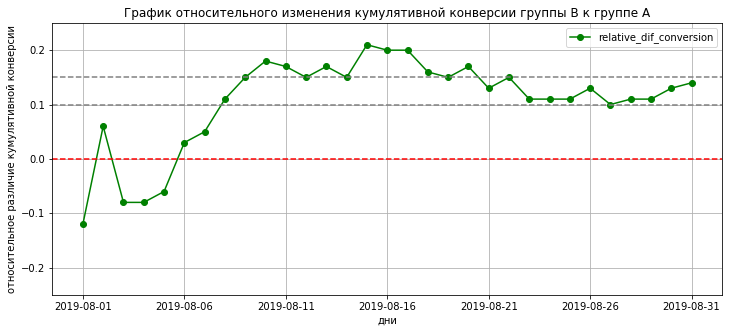

In [45]:
cumulative_conversion.plot(x='date', y='relative_dif_conversion', 
                           figsize=(12, 5), grid=True, style='-o', color='green',
                           ylim=(-0.25, 0.25))

plt.xlabel('дни')
plt.ylabel('относительное различие кумулятивной конверсии')
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')

plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.axhline(y=0, color='red', linestyle='--') 

plt.show()

Группа В почти сразу же вырвалась вперед, отношение конверсии постепенно устанавливается к концу месяца. 

### Анализ крайних значений данных (выбросов и всплексов)

#### точечный график количества заказов по пользователям

In [46]:
#способ из теории:
# orders_by_users = (orders.drop(['group', 'revenue', 'date'], axis=1)
#                   .groupby('visitor_id', as_index=False)
#                   .agg({'transaction_id': pd.Series.nunique}))
#ИЛИ:

orders_by_users = orders.groupby('visitor_id', as_index=False)['transaction_id'].count()
orders_by_users.columns = ['visitor_id', 'orders']

orders_by_users.sort_values(by='orders', ascending=False).head()

,visitor_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5


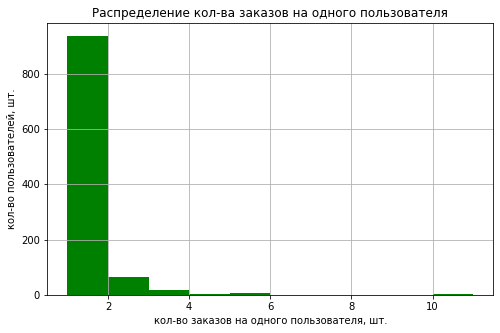

In [47]:
orders_by_users['orders'].hist(bins=10, figsize=(8, 5), color='green')
plt.xlabel('кол-во заказов на одного пользователя, шт.')
plt.ylabel('кол-во пользователей, шт.')
plt.title('Распределение кол-ва заказов на одного пользователя')
plt.show()

Подавляющее большинство совершает только один заказ, но есть и те, кто делаем 2-3 заказа.

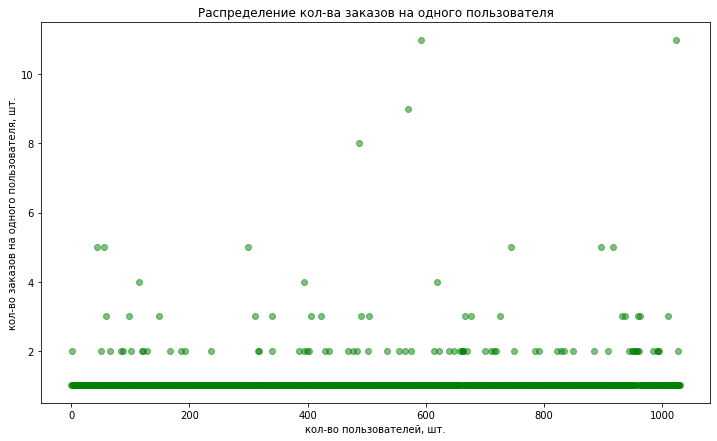

In [48]:
x_values = pd.Series(range(0, len(orders_by_users['orders'])))

plt.figure(figsize=(12, 7))
plt.scatter(x = x_values, y = orders_by_users['orders'], color='green', alpha=0.5)
plt.xlabel('кол-во пользователей, шт.')
plt.ylabel('кол-во заказов на одного пользователя, шт.')
plt.title('Распределение кол-ва заказов на одного пользователя')
plt.show()

На точечном графике также видим подтверждение ранее сделанных выводов о кол-ве заказов на одного пользователя. 

#### 95-й и 99-й перцентили количества заказов на пользователя

Посчитаем выборочные перцентили количества заказов на одного пользователя.

In [49]:
perc_list = [90, 95, 99]

In [50]:
for i in perc_list:
    print('{} перцентиль количества заказов на одного пользователя:'.format(i), 
          np.percentile(orders_by_users['orders'], i)) 

90 перцентиль количества заказов на одного пользователя: 1.0
95 перцентиль количества заказов на одного пользователя: 2.0
99 перцентиль количества заказов на одного пользователя: 4.0


90 % пользователей делают по одному заказу, остальные 10 % делали заказ более одного раза.

Не более 5 % пользователей делают по два заказа.

И не более, чем 1 % от общего числа пользователей совершают от 4 заказов. 

За нижнюю границу числа заказов возьмём всё, что выше 99 перцентиля, т.е. пользователи, совершающие 4 или более заказов будут для нас аномальными, их менее 1 %.

#### точечный график стоимостей заказов

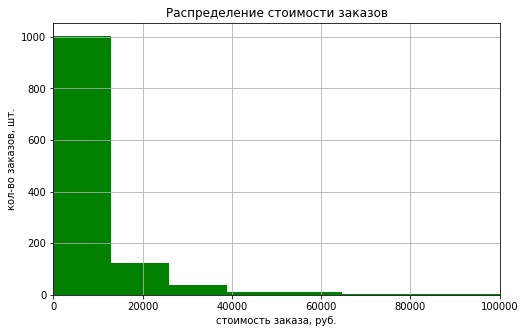

In [51]:
orders['revenue'].hist(bins=100, figsize=(8, 5), color='green')
plt.xlim(0, 100000)
plt.xlabel('стоимость заказа, руб.')
plt.ylabel('кол-во заказов, шт.')
plt.title('Распределение стоимости заказов')
plt.show()

Большая часть заказов не дороже 15 000 руб., но есть заказы и на суммы более 40 000, 80 000 и 100 000 руб. 

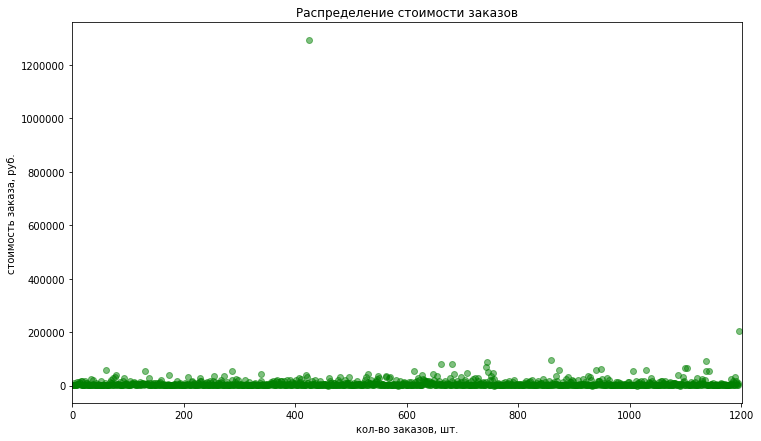

In [52]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.figure(figsize=(12, 7))
plt.scatter(x = x_values, y = orders['revenue'], color='green', alpha=0.5)
plt.xlim(0, 1201)
plt.xlabel('кол-во заказов, шт.')
plt.ylabel('стоимость заказа, руб.')
plt.title('Распределение стоимости заказов')
plt.show()

Есть единичные заказы более 20 000 руб., но всё что менее этой суммы слилось в одну линию, укрупним график, ограничив его по оси Y.

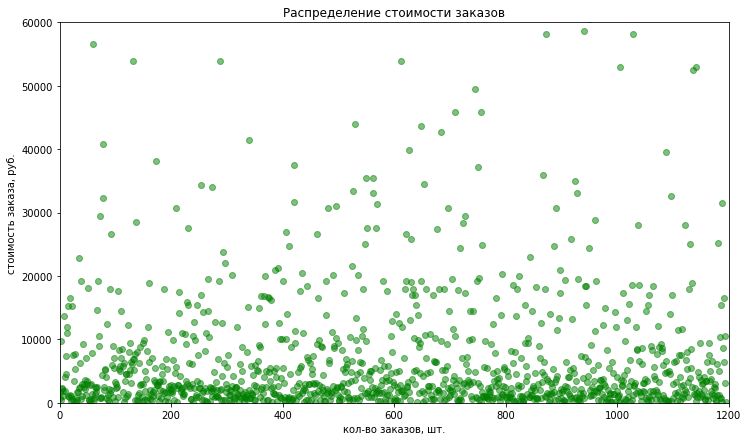

In [53]:
plt.figure(figsize=(12, 7))
plt.scatter(x = x_values, y = orders['revenue'], color='green', alpha=0.5)
plt.xlim(0, 1201)
plt.ylim(0, 60000)
plt.xlabel('кол-во заказов, шт.')
plt.ylabel('стоимость заказа, руб.')
plt.title('Распределение стоимости заказов')
plt.show()

Теперь график отражает ту же картину, что и гистограмма выше. Много заказов до 15 000 руб., но есть и со стоимость выше.

По такому графику сложно решить какое значение принять за границу аномальных значений. Прибегнем к помощи статистики и найдем перцентили стоимости заказов. 

#### 95-й и 99-й перцентили стоимости заказов

Сделаем по аналогии с кол-ом заказов, используем те же значения перцентилей, и соответственно, тот же список значений

In [54]:
for i in perc_list:
    print('{} перцентиль количества заказов на одного пользователя:'.format(i), 
          np.percentile(orders['revenue'], i).round(2)) 

90 перцентиль количества заказов на одного пользователя: 18168.0
95 перцентиль количества заказов на одного пользователя: 28000.0
99 перцентиль количества заказов на одного пользователя: 58233.2


Стоимость менее 10 % заказов более 18 000 руб. и менее 5 % заказов совершается на сумму свыше 28 000 руб. 

Заказы свыше 58 000 руб. совершаются менее, чем в 1 % случаев. 

Применим свой "профешенел жужмент" (*professional judgment*) и примем за нижнюю границу аномальных значений сумму по заказу свыше 28 000 руб. (95 перцентиль). 

### Статистическая значимость различий:

#### подготовка данных

In [55]:
#группа A
#визиты в день
visitors_A = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_A.columns = ['date', 'visitors_per_date_A']

#визиты в день накопительным итогом
visitors_A['cum_visitors_A'] = (
    visitors_A
    .apply(lambda x: visitors_A[visitors_A['date'] <= x['date']]
           .agg({'visitors_per_date_A': 'sum'}), axis=1)
                 )

visitors_A.head()

,date,visitors_per_date_A,cum_visitors_A
0,2019-08-01,719,719
1,2019-08-02,619,1338
2,2019-08-03,507,1845
3,2019-08-04,717,2562
4,2019-08-05,756,3318


In [56]:
#группа B
#визиты в день
visitors_B = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_B.columns = ['date', 'visitors_per_date_B']

#визиты в день накопительным итогом
visitors_B['cum_visitors_B'] = (
    visitors_B
    .apply(lambda x: visitors_B[visitors_B['date'] <= x['date']]
           .agg({'visitors_per_date_B': 'sum'}), axis=1)
                 )

visitors_B.head()

,date,visitors_per_date_B,cum_visitors_B
31,2019-08-01,713,713
32,2019-08-02,581,1294
33,2019-08-03,509,1803
34,2019-08-04,770,2573
35,2019-08-05,707,3280


In [57]:
#группа А
#заказы и доход в день
orders_A = (orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
                 .groupby('date', as_index=False)
                  .agg({
                      'transaction_id': pd.Series.nunique,
                      'revenue': 'sum'
                  })
                 )
orders_A.columns = ['date', 'orders_per_date_A', 'revenue_per_date_A']

#заказы в день накопительным итогом
orders_A['cum_orders_A'] = (
    orders_A
    .apply(lambda x: orders_A[orders_A['date'] <= x['date']]
          .agg({'orders_per_date_A': 'sum'}), axis=1)
           )

#доход в день накопительным итогом
orders_A['cum_revenue_A'] = (
    orders_A
    .apply(lambda x: orders_A[orders_A['date'] <= x['date']]
          .agg({'revenue_per_date_A': 'sum'}), axis=1)
           )

orders_A.head()

,date,orders_per_date_A,revenue_per_date_A,cum_orders_A,cum_revenue_A
0,2019-08-01,24,148579,24,148579
1,2019-08-02,20,93822,44,242401
2,2019-08-03,24,112473,68,354874
3,2019-08-04,16,70825,84,425699
4,2019-08-05,25,124218,109,549917


In [58]:
#группа B
#заказы и доход в день
orders_B = (orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
                 .groupby('date', as_index=False)
                  .agg({
                      'transaction_id': pd.Series.nunique,
                      'revenue': 'sum'
                  })
                 )
orders_B.columns = ['date', 'orders_per_date_B', 'revenue_per_date_B']

#заказы в день накопительным итогом
orders_B['cum_orders_B'] = (
    orders_B
    .apply(lambda x: orders_B[orders_B['date'] <= x['date']]
          .agg({'orders_per_date_B': 'sum'}), axis=1)
           )

#доход в день накопительным итогом
orders_B['cum_revenue_B'] = (
    orders_B
    .apply(lambda x: orders_B[orders_B['date'] <= x['date']]
          .agg({'revenue_per_date_B': 'sum'}), axis=1)
           )

orders_B.head()

,date,orders_per_date_B,revenue_per_date_B,cum_orders_B,cum_revenue_B
0,2019-08-01,21,101217,21,101217
1,2019-08-02,24,165531,45,266748
2,2019-08-03,16,114248,61,380996
3,2019-08-04,17,108571,78,489567
4,2019-08-05,23,92428,101,581995


In [59]:
df = (orders_A
      .merge(orders_B, on='date', how='left')
      .merge(visitors_A, on='date', how='left')
      .merge(visitors_B, on='date', how='left')
)

df.head()

,date,orders_per_date_A,revenue_per_date_A,cum_orders_A,cum_revenue_A,orders_per_date_B,revenue_per_date_B,cum_orders_B,cum_revenue_B,visitors_per_date_A,cum_visitors_A,visitors_per_date_B,cum_visitors_B
0,2019-08-01,24,148579,24,148579,21,101217,21,101217,719,719,713,713
1,2019-08-02,20,93822,44,242401,24,165531,45,266748,619,1338,581,1294
2,2019-08-03,24,112473,68,354874,16,114248,61,380996,507,1845,509,1803
3,2019-08-04,16,70825,84,425699,17,108571,78,489567,717,2562,770,2573
4,2019-08-05,25,124218,109,549917,23,92428,101,581995,756,3318,707,3280


Проверим результаты объединения.

In [60]:
def check_merge(df, row):
    for i in row:
        print('Сумма по столбцу "{}" - '.format(i), df[i].sum()) 

визиты группа А 

In [61]:
check_merge(visitors_A, ['visitors_per_date_A', 'cum_visitors_A'])

Сумма по столбцу "visitors_per_date_A" -  18736
Сумма по столбцу "cum_visitors_A" -  305673


In [62]:
check_merge(df, ['visitors_per_date_A', 'cum_visitors_A'])

Сумма по столбцу "visitors_per_date_A" -  18736
Сумма по столбцу "cum_visitors_A" -  305673


визиты группа В

In [63]:
check_merge(visitors_B, ['visitors_per_date_B', 'cum_visitors_B'])

Сумма по столбцу "visitors_per_date_B" -  18916
Сумма по столбцу "cum_visitors_B" -  307092


In [64]:
check_merge(df, ['visitors_per_date_B', 'cum_visitors_B'])

Сумма по столбцу "visitors_per_date_B" -  18916
Сумма по столбцу "cum_visitors_B" -  307092


заказы группы А

In [65]:
check_merge(orders_A, ['orders_per_date_A', 'revenue_per_date_A', 'cum_orders_A', 'cum_revenue_A'])

Сумма по столбцу "orders_per_date_A" -  557
Сумма по столбцу "revenue_per_date_A" -  4084803
Сумма по столбцу "cum_orders_A" -  9229
Сумма по столбцу "cum_revenue_A" -  62755023


In [66]:
check_merge(df, ['orders_per_date_A', 'revenue_per_date_A', 'cum_orders_A', 'cum_revenue_A'])

Сумма по столбцу "orders_per_date_A" -  557
Сумма по столбцу "revenue_per_date_A" -  4084803
Сумма по столбцу "cum_orders_A" -  9229
Сумма по столбцу "cum_revenue_A" -  62755023


заказы группы В

In [67]:
check_merge(orders_B, ['orders_per_date_B', 'revenue_per_date_B', 'cum_orders_B', 'cum_revenue_B'])

Сумма по столбцу "orders_per_date_B" -  640
Сумма по столбцу "revenue_per_date_B" -  5907760
Сумма по столбцу "cum_orders_B" -  10466
Сумма по столбцу "cum_revenue_B" -  90043396


In [68]:
check_merge(df, ['orders_per_date_B', 'revenue_per_date_B', 'cum_orders_B', 'cum_revenue_B'])

Сумма по столбцу "orders_per_date_B" -  640
Сумма по столбцу "revenue_per_date_B" -  5907760
Сумма по столбцу "cum_orders_B" -  10466
Сумма по столбцу "cum_revenue_B" -  90043396


In [69]:
#таблицы по группам с пользователями и кол-вом заказов, которые они совершили 
order_by_users_A = (orders[orders['group'] == 'A']
                    .groupby('visitor_id', as_index=False)
                    .agg({'transaction_id': pd.Series.nunique})
                   )

order_by_users_A.columns = ['visitor_id', 'orders']

order_by_users_B = (orders[orders['group'] == 'B']
                    .groupby('visitor_id', as_index=False)
                    .agg({'transaction_id': pd.Series.nunique})
                   )

order_by_users_B.columns = ['visitor_id', 'orders']

In [70]:
order_by_users_A.sort_values(by='orders', ascending=False).head()

,visitor_id,orders
499,4256040402,7
227,2038680547,5
278,2458001652,5
269,2378935119,4
18,199603092,4


In [71]:
sample_A = pd.concat(
    [order_by_users_A['orders'], 
     pd.Series(0, index=np.arange(df['visitors_per_date_A'].sum() - len(order_by_users_A['orders'])), 
               name='orders')]
    , axis=0
)

sample_B = pd.concat(
    [order_by_users_B['orders'], 
     pd.Series(0, index=np.arange(df['visitors_per_date_B'].sum() - len(order_by_users_B['orders'])), 
               name='orders')]
    , axis=0
)

#pd.Series(0, index=np.arange(df['visitors_per_date_A'].sum() - len(order_by_users_A['orders'])), name='orders')
# список нулей для пользователей, которые ничего не заказывали. 
# их количество равно разнице между суммой посетителей и количеством записей о заказа

Ранее мы определили, что аномальными будем считать значения выше 95 перцентилей:
- более 4 заказов
- стоимость заказа более 28 000 руб.

Найдем кол-во пользователей, совершающих такие ~~возмутительно~~ аномальный действия.

In [72]:
users_with_many_orders = pd.concat(
    [
        order_by_users_A[order_by_users_A['orders'] >= 4]['visitor_id'],
        order_by_users_B[order_by_users_B['orders'] >= 4]['visitor_id'],
    ],
    axis=0,
)

users_with_expensive_orders = orders[orders['revenue'] > 28000]['visitor_id']

abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)

#print(abnormal_users.head(5))
print('Кол-во пользователей с аномальной активностью:', abnormal_users.shape[0]) 

Кол-во пользователей с аномальной активностью: 63


Очистим наши данные

In [73]:
filter_sample_A = pd.concat(
    [
        order_by_users_A[
            np.logical_not(order_by_users_A['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                df['visitors_per_date_A'].sum() - len(order_by_users_A['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

filter_sample_B = pd.concat(
    [
        order_by_users_B[
            np.logical_not(order_by_users_B['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                df['visitors_per_date_B'].sum() - len(order_by_users_B['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

#### гипотеза о различии конверсий 

Гипотезы:

Н0: Различие конверсий между группами А и В отсутствует.

Н1: Между конверсиями групп А и В есть различие.

Посмотрим сначала результаты **по «сырым» данным**

In [74]:
print("p-value: {0:.3f}".format(stats.mannwhitneyu(sample_A, sample_B, True, 'two-sided')[1]))

print("Отношение конверсии группы В к конверсии группы А: {0:.3f}"
      .format(sample_B.mean() / sample_A.mean() - 1)) 

p-value: 0.017
Отношение конверсии группы В к конверсии группы А: 0.138


p-value ниже порогового значения 0,05, значит у нас есть основание отвергнуть нулевую гипотезу. По "сырым" данным различие в конверсиях групп А и В присутствует.

При этом стоит отметить, что конверсия группы В выше, чем в группе А, на 13,8 %. 

Теперь посчитаем те же показатели для **«очищенных» данных**

In [75]:
print("p-value: {0:.3f}".format(stats.mannwhitneyu(filter_sample_A, filter_sample_B, True, 'two-sided')[1]))

print("Отношение конверсии группы В к конверсии группы А: {0:.3f}"
      .format(filter_sample_B.mean() / filter_sample_A.mean() - 1)) 

p-value: 0.018
Отношение конверсии группы В к конверсии группы А: 0.148


и по очищенным данных отвергаем нулевую гипотезу. Причем показатели изменились не сильно, отношение конверсии увеличилось на 1 %, можно сделать вывод, что "выбросы" не оказали существенного влияния на результаты. 

#### гипотеза о равенстве среднего чека 

Гипотезы:

Н0: Средние чеки в группах А и В равны.

Н1: Средние чеки в группах А и В не равны.

**по «сырым» данным:**

In [76]:
print('p-value: {0:.3f}'.format(stats.mannwhitneyu(
    orders[orders['group']=='A']['revenue'], 
    orders[orders['group']=='B']['revenue'], True, 'two-sided')[1]))

print('Отношение среднего чека группы В к среднему чеку группы А: {0:.3f}'.format(
    orders[orders['group']=='B']['revenue'].mean() / orders[orders['group']=='A']['revenue'].mean() - 1)) 

p-value: 0.729
Отношение среднего чека группы В к среднему чеку группы А: 0.259


p-value больше порогового значения 0,05. Значит у нас опять нет основание отвергать нулевыую гипотезу, можно считать, что *статистически значимой* разницы между средними чеками групп нет. При этом средний чек по группе В больше среднего чека группы В на 25,9 %. 

**по «очищенным» данным:**

In [77]:
print('p-value: {0:.3f}'.format(stats.mannwhitneyu(
            orders[np.logical_and(
                    orders['group'] == 'A', 
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Отношение среднего чека группы В к среднему чеку группы А: {0:.3f}'.format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

p-value: 0.488
Отношение среднего чека группы В к среднему чеку группы А: -0.017


По "очищенным" данных также не можем отвергнуть нулевую гипотезу, средние чеки с точки зрения статистической значимости равно. При этом отношение средних поменялось, после "очистки" разница составляет 1,7 %, причем в пользу группы А. 

# Общие выводы и рекомендации

По результатам проведенного исследования мы зафиксировали статистически значимые различия конверсии группы В по результатам А/В тестирования. Конверсия группы В больше на 13-14 %. Средний чек в группах не отличается. 

Все основные метрики (кумулятивная выручка, средний чек и конверсия) стабилизировались к концу наблюдаемого периода. 

Исходя из вышеизложенного можно дать рекомендации: остановить тест и зафиксировать победу группы В в части увеличения конверсии. 

*Исходя из того, что в начале изучения данных мы обнаружили дубли пользователей в группах необходимо признать проведенный тест несостоявшимся, изучить и устранить причины, которые привели к дублям и провести тест заново.*